# Spherical waves

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import pandas as pd
from numpy.random import randn
from scipy.stats import norm
from ipywidgets import Image
from time import sleep,time
from threading import Thread
from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


In [58]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    return( np.exp(1j*(k*np.linalg.norm(r-r0)-omega*t))/np.linalg.norm(r-r0))

#### Plot the amplitude of the field as a functon of distance

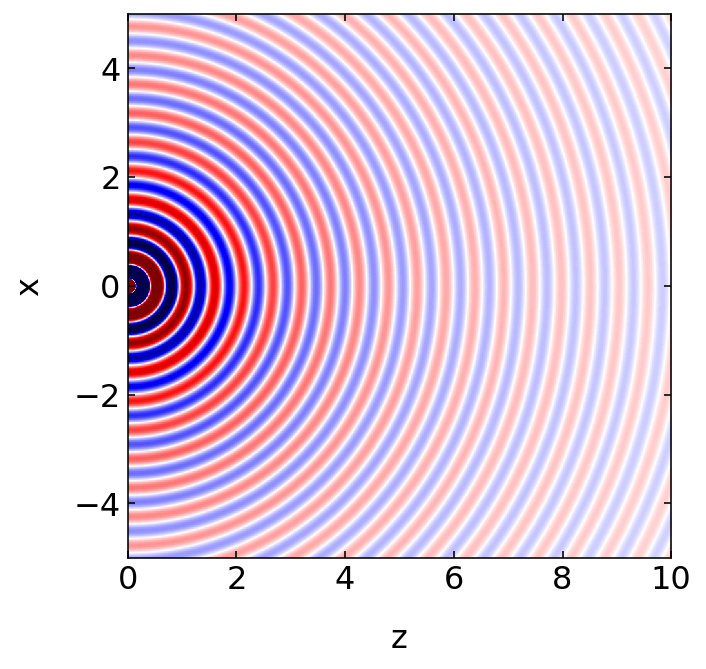

In [59]:
plt.figure(figsize=(5,5))

x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(0,10e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,0])

field=spherical_wave(k,omega0,r,r0,0)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1e6,vmax=1e6,cmap='seismic')

plt.xlabel('z')
plt.ylabel('x')
plt.show()

Text(0, 0.5, 'intensity [a.u.]')

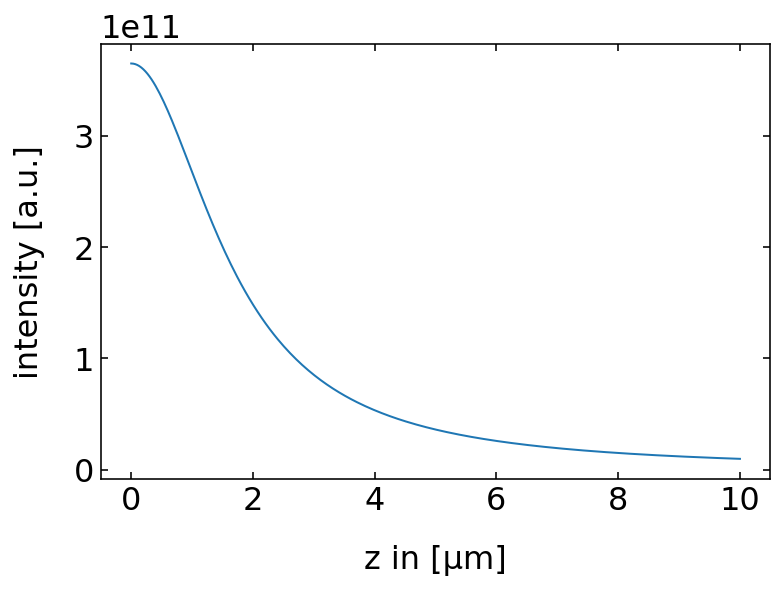

In [60]:
plt.plot(z*1e6,np.abs(field.transpose()[100,:])**2)
plt.xlabel('z in [µm]')
plt.ylabel('intensity [a.u.]')

#### Plot the intensity in a plane z


We can alo plot the intensity of a spherical wave at a certain distance from the source in the xy-plane.

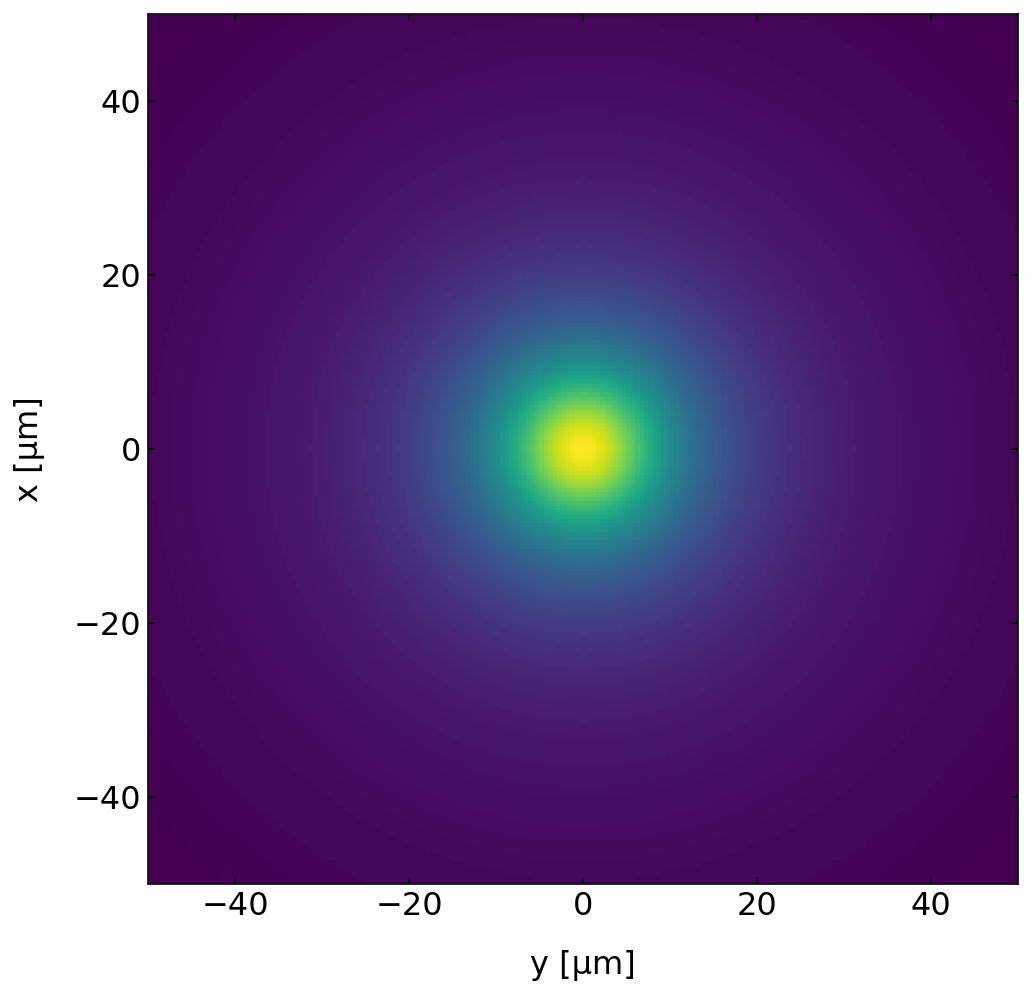

In [47]:
plt.figure(figsize=(8,8))
x=np.linspace(-50e-6,50e-6,200)
y=np.linspace(-50e-6,50e-6,200)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,10e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-20e-9])
field=spherical_wave(k1,omega0,r,r0,0)
cmap = plt.cm.get_cmap("jet")

plt.imshow(np.abs(field)**2,extent=[-50,50,-50,50])

plt.xlabel('y [µm]')
plt.ylabel('x [µm]')
plt.show()

#### Interference between a spherical and a plane wave

In [52]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

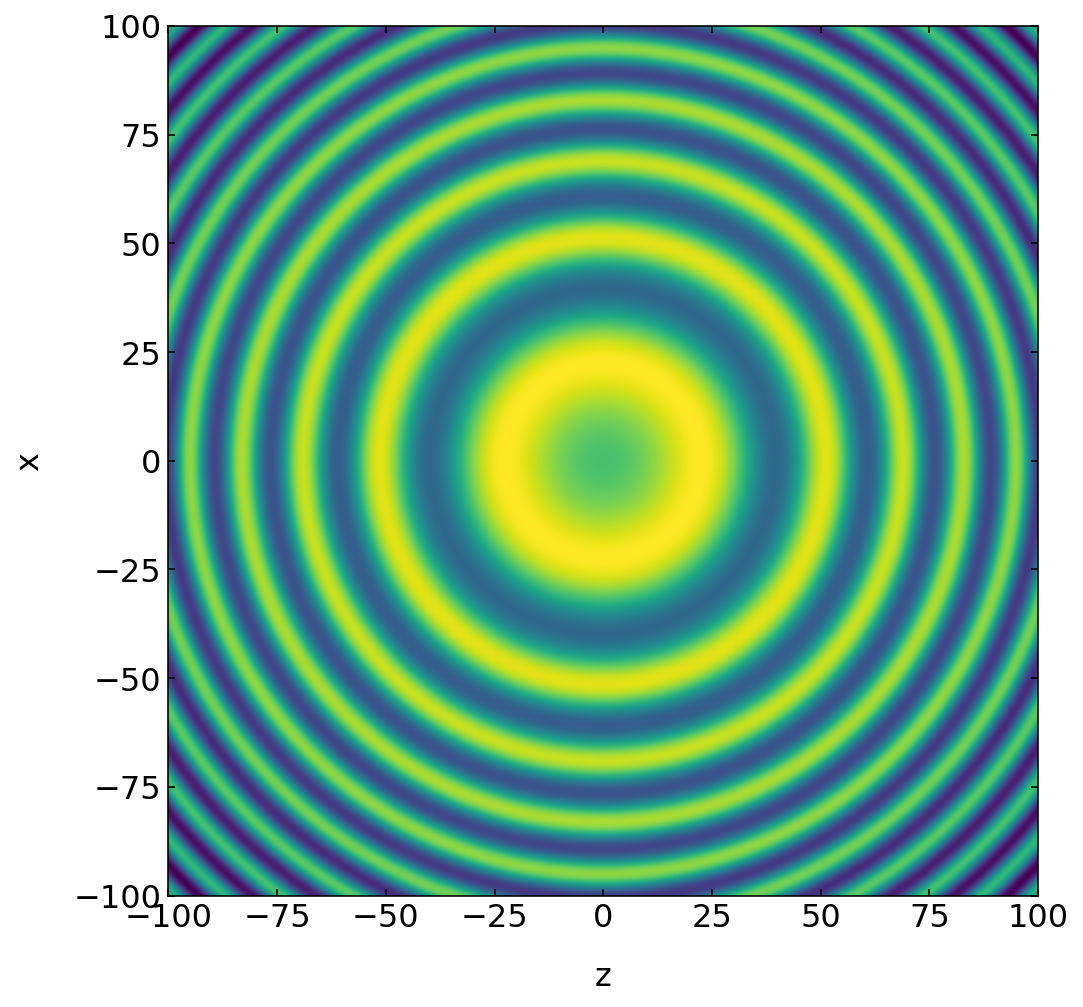

In [56]:
plt.figure(figsize=(8,8))
x=np.linspace(-100e-6,100e-6,1000)
y=np.linspace(-100e-6,100e-6,1000)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,2000e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-2e-6])

field=plane_wave(k1,omega0,r,0)+spherical_wave(k1,omega0,r,r0,0)
cmap = plt.cm.get_cmap("jet")

extent = np.min(y)*1e6, np.max(y)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose()),extent=extent)

plt.xlabel('z')
plt.ylabel('x')
plt.show()
